In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [6]:
import zipfile
import os

# Correct Path
zip_path = "/content/drive/MyDrive/tumer.zip"

# Extract ZIP file
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
    print("Dataset extracted successfully!")
else:
    print(" Error: File not found. Check the file path.")


Dataset extracted successfully!


In [7]:
import os

# Check extracted folder structure
print("Extracted Files/Folders:", os.listdir("/content/"))


Extracted Files/Folders: ['.config', '.ipynb_checkpoints', 'Testing', 'Training', 'drive', 'sample_data']


In [8]:
train_path = "/content/Training"
test_path = "/content/Testing"

# Check folder structure
print("Training Folders:", os.listdir(train_path))
print("Testing Folders:", os.listdir(test_path))


Training Folders: ['notumor', 'glioma', 'pituitary', 'meningioma']
Testing Folders: ['notumor', 'glioma', 'pituitary', 'meningioma']


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size
img_size = (224, 224)

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Testing Data - Only Normalization
test_datagen = ImageDataGenerator(rescale=1./255)

# Data Loading
train_generator = train_datagen.flow_from_directory(
    "/content/Training",
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    "/content/Testing",
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


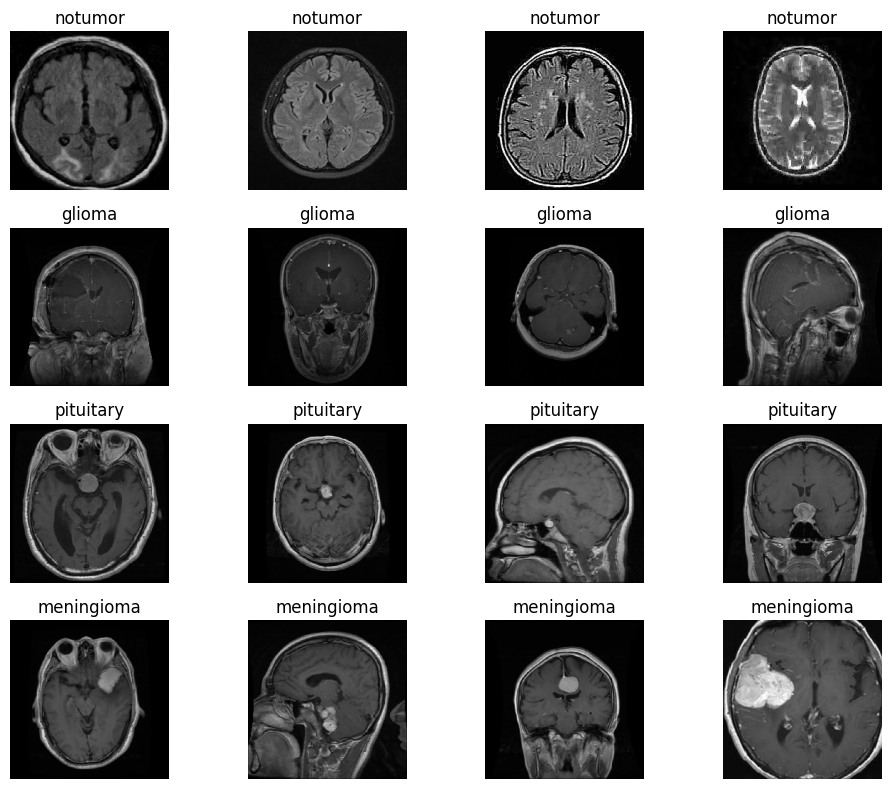

In [14]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing import image

# Function to Display Sample Images
def display_sample_images(folder_path, num_images=4):
    categories = os.listdir(folder_path)

    plt.figure(figsize=(10, 8))
    for i, category in enumerate(categories):
        category_path = os.path.join(folder_path, category)
        sample_images = random.sample(os.listdir(category_path), num_images)

        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(category_path, img_name)
            img = image.load_img(img_path, target_size=(224, 224))

            plt.subplot(len(categories), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display Sample Images from Training Data
display_sample_images("/content/Training")


In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# VGG16 Model (Pre-trained)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze Pre-trained Layers
for layer in base_model.layers:
    layer.trainable = False

# Custom Layers for Brain Tumor Detection
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)  # 4 Classes

model = Model(inputs=base_model.input, outputs=x)

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,562,308 (105.14 MB)

 Trainable params: 12,847,620 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 127s 636ms/step - accuracy: 0.6658 - loss: 0.8088 - val_accuracy: 0.8101 - val_loss: 0.4916
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 114s 546ms/step - accuracy: 0.8359 - loss: 0.4260 - val_accuracy: 0.8230 - val_loss: 0.4604
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 538ms/step - accuracy: 0.8636 - loss: 0.3634 - val_accuracy: 0.8619 - val_loss: 0.3740
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 556ms/step - accuracy: 0.8730 - loss: 0.3444 - val_accuracy: 0.8619 - val_loss: 0.3650
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 534ms/step - accuracy: 0.8906 - loss: 0.3091 - val_accuracy: 0.8467 - val_loss: 0.3967
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 536ms/step - accuracy: 0.8823 - loss: 0.3191 - val_accuracy: 0.8658 - val_loss: 0.3704
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 564ms/step - accuracy: 0.8824 - loss: 0.3058 - val_accuracy: 0.8772 - val_loss: 0.3063
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 95s 532ms/step - accuracy: 0.8899 - lo

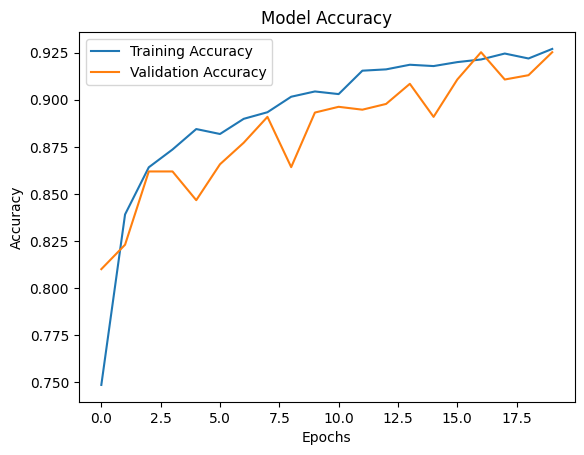

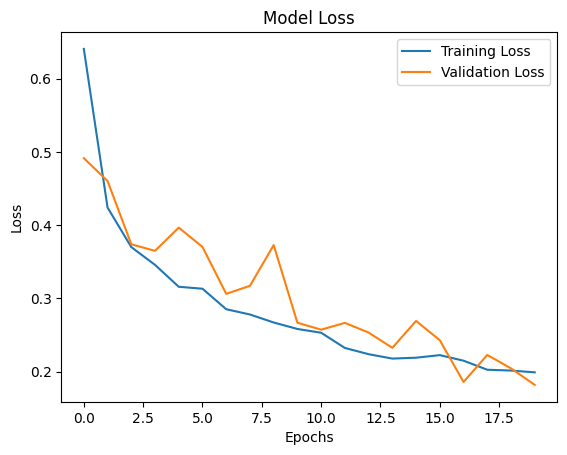

In [12]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step


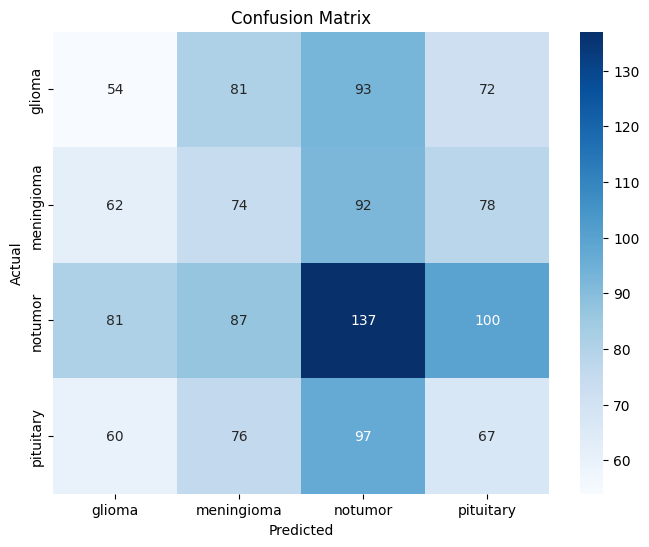

              precision    recall  f1-score   support

      glioma       0.21      0.18      0.19       300
  meningioma       0.23      0.24      0.24       306
     notumor       0.33      0.34      0.33       405
   pituitary       0.21      0.22      0.22       300

    accuracy                           0.25      1311
   macro avg       0.25      0.25      0.25      1311
weighted avg       0.25      0.25      0.25      1311



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))


In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint for Best Model Saving
checkpoint = ModelCheckpoint(
    "best_brain_tumor_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


In [22]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator),
    callbacks=[early_stopping, checkpoint, lr_scheduler]
)


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9114 - loss: 0.2316
Epoch 1: val_accuracy improved from -inf to 0.90008, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 454ms/step - accuracy: 0.9114 - loss: 0.2317 - val_accuracy: 0.9001 - val_loss: 0.2405 - learning_rate: 1.0000e-04
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9221 - loss: 0.2092
Epoch 2: val_accuracy did not improve from 0.90008
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 462ms/step - accuracy: 0.9221 - loss: 0.2092 - val_accuracy: 0.8894 - val_loss: 0.2980 - learning_rate: 1.0000e-04
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.9354 - loss: 0.1746
Epoch 3: val_accuracy improved from 0.90008 to 0.91533, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 138s 442ms/step - accuracy: 0.9354 - loss: 0.1745 - val_accuracy: 0.9153 - val_loss: 0.2318 - learning_rate: 1.0000e-04
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.9447 - loss: 0.1539
Epoch 4: val_accuracy improved from 0.91533 to 0.91609, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 445ms/step - accuracy: 0.9447 - loss: 0.1539 - val_accuracy: 0.9161 - val_loss: 0.2048 - learning_rate: 1.0000e-04
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9453 - loss: 0.1456
Epoch 5: val_accuracy improved from 0.91609 to 0.92830, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 456ms/step - accuracy: 0.9453 - loss: 0.1456 - val_accuracy: 0.9283 - val_loss: 0.1714 - learning_rate: 1.0000e-04
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9450 - loss: 0.1463
Epoch 6: val_accuracy improved from 0.92830 to 0.93822, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 455ms/step - accuracy: 0.9450 - loss: 0.1463 - val_accuracy: 0.9382 - val_loss: 0.1560 - learning_rate: 1.0000e-04
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9520 - loss: 0.1325
Epoch 7: val_accuracy did not improve from 0.93822
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 450ms/step - accuracy: 0.9520 - loss: 0.1325 - val_accuracy: 0.9275 - val_loss: 0.2083 - learning_rate: 1.0000e-04
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9590 - loss: 0.1072
Epoch 8: val_accuracy did not improve from 0.93822

Epoch 8: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 448ms/step - accuracy: 0.9590 - loss: 0.1072 - val_accuracy: 0.9283 - val_loss: 0.1721 - learning_rate: 1.0000e-04
Epoch 9/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9638 - loss: 0.0973
Epoch 9: val_accuracy improved from 0.93822 to 0.94661, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 450ms/step - accuracy: 0.9638 - loss: 0.0973 - val_accuracy: 0.9466 - val_loss: 0.1342 - learning_rate: 2.0000e-05
Epoch 10/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9729 - loss: 0.0777
Epoch 10: val_accuracy improved from 0.94661 to 0.95347, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 457ms/step - accuracy: 0.9729 - loss: 0.0777 - val_accuracy: 0.9535 - val_loss: 0.1189 - learning_rate: 2.0000e-05
Epoch 11/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9683 - loss: 0.0861
Epoch 11: val_accuracy did not improve from 0.95347
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 443ms/step - accuracy: 0.9683 - loss: 0.0861 - val_accuracy: 0.9512 - val_loss: 0.1230 - learning_rate: 2.0000e-05
Epoch 12/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9732 - loss: 0.0713
Epoch 12: val_accuracy improved from 0.95347 to 0.95805, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 457ms/step - accuracy: 0.9732 - loss: 0.0713 - val_accuracy: 0.9580 - val_loss: 0.1057 - learning_rate: 2.0000e-05
Epoch 13/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9809 - loss: 0.0569
Epoch 13: val_accuracy did not improve from 0.95805
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 457ms/step - accuracy: 0.9809 - loss: 0.0569 - val_accuracy: 0.9580 - val_loss: 0.1130 - learning_rate: 2.0000e-05
Epoch 14/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9822 - loss: 0.0556
Epoch 14: val_accuracy did not improve from 0.95805

Epoch 14: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 444ms/step - accuracy: 0.9822 - loss: 0.0556 - val_accuracy: 0.9565 - val_loss: 0.1176 - learning_rate: 2.0000e-05
Epoch 15/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.9750 - loss: 0.0741
Epoch 15: val_accuracy improved from 0.95805 to 0.95881, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 451ms/step - accuracy: 0.9750 - loss: 0.0740 - val_accuracy: 0.9588 - val_loss: 0.1021 - learning_rate: 4.0000e-06
Epoch 16/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.9833 - loss: 0.0548
Epoch 16: val_accuracy improved from 0.95881 to 0.96034, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 448ms/step - accuracy: 0.9833 - loss: 0.0548 - val_accuracy: 0.9603 - val_loss: 0.1022 - learning_rate: 4.0000e-06
Epoch 17/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.9797 - loss: 0.0542
Epoch 17: val_accuracy improved from 0.96034 to 0.96186, saving model to best_brain_tumor_model.h5


179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 442ms/step - accuracy: 0.9797 - loss: 0.0542 - val_accuracy: 0.9619 - val_loss: 0.0953 - learning_rate: 4.0000e-06
Epoch 18/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9784 - loss: 0.0628
Epoch 18: val_accuracy did not improve from 0.96186
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 448ms/step - accuracy: 0.9784 - loss: 0.0628 - val_accuracy: 0.9619 - val_loss: 0.0993 - learning_rate: 4.0000e-06
Epoch 19/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9837 - loss: 0.0479
Epoch 19: val_accuracy did not improve from 0.96186

Epoch 19: ReduceLROnPlateau reducing learning rate to 1e-06.
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 443ms/step - accuracy: 0.9837 - loss: 0.0480 - val_accuracy: 0.9580 - val_loss: 0.1012 - learning_rate: 4.0000e-06
Epoch 20/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9814 - loss: 0.0520
Epoch 20: val_accuracy did not improve from 0.96186
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 451ms/step - accuracy: 0.9814 - loss: 

In [23]:
model.save("brain_tumor_model_final.h5")


In [25]:
import os

# Check current directory and list files
print("Current Directory:", os.getcwd())
print("Files in Directory:", os.listdir("/content/"))


Current Directory: /content
Files in Directory: ['.config', 'best_brain_tumor_model.h5', '.ipynb_checkpoints', 'Testing', 'brain_tumor_model_final.h5', 'Training', 'drive', 'sample_data']


In [26]:
import tensorflow as tf
from tensorflow import keras

# Load the existing .h5 model
model = keras.models.load_model("/content/best_brain_tumor_model.h5")

# Save it in .keras format
model.save("/content/best_brain_tumor_model.keras")

print("✅ Model successfully converted to `.keras` format!")


✅ Model successfully converted to `.keras` format!


In [27]:
import os
print("Files in Directory:", os.listdir("/content/"))


Files in Directory: ['.config', 'best_brain_tumor_model.h5', '.ipynb_checkpoints', 'Testing', 'brain_tumor_model_final.h5', 'best_brain_tumor_model.keras', 'Training', 'drive', 'sample_data']
